음성파일 인식하여 텍스트로 변환시키기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%pip install transformers
## 신경망 언어모델 기반 딥러닝 라이브러리 transformers

In [ ]:
import torch                            ## pytorch 딥러닝 프레임워크, 페이스북 AI 팀에 의해 개발 , 데이터 작업과 모델 생성, 최적화 등...
import librosa                          ## 파이썬 음성데이터 분석해주는 라이브러리
import numpy as np                      ## numpy
import soundfile as sf                  ## 음성 데이터 가져올 때 사용
from scipy.io import wavfile            ## wav 파일 가져올 때
from IPython.display import Audio       ## 음성데이터 재생할 때 필요
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer    ##  Wav2Vec 프랜스포터 라이브러리, 음성데이터를 백터값으로 변환, 음성인식에 매우 좋은 성능

In [ ]:
## 이전에 학습된 데이터를 이용
## pre-trained 모델

## 토크나이져 : 입력된 텍스트를 모델에서 처리할 수 있는 데이터로 변환
## 모델은 숫자만 처리할 수 있음
## 텍스트 입력 -> 숫자 데이터로 변환

tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")    ## 모델을 로드하고 저장 : from_pretrained() / save_pretrained()
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")           ## 이미 학습된 모델을 가져옴

In [ ]:
###### 음성인식에 필요한 모델들 불러와서 저장######

In [ ]:
## 음성 파일 지정후 집어넣기
file_name ='/content/drive/MyDrive/음성인식/notebook.wav'
Audio(file_name) ## 음성데이터 재생을 위해 사용되는 라이브러리

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
data = wavfile.read(file_name)                ## wav 파일
framerate = data[0]
sounddata = data[1]
time = np.arange(0,len(sounddata))/framerate
print('Sampling rate:',framerate,'Hz')

## 데이터를 시계열로

Sampling rate: 48000 Hz


In [ ]:
# librosa 라이브러리
input_audio, _ = librosa.load(file_name, sr=16000)

In [ ]:
## 음성파일 토크나이저
input_values = tokenizer(input_audio, return_tensors="pt").input_values

logits = model(input_values).logits

## pytorch 라이브러리 argmax
predicted_ids = torch.argmax(logits, dim=-1)

## 텍스트 변환하기 위해
transcription = tokenizer.batch_decode(predicted_ids)[0]
print(transcription)

I HAVE NO ONE SPECIAL JUST A COMMON MAN WITH COMMON THOUGHTS I'VE LED A COMMON LIFE THERE ARE NO MONUMENTS DEDICATED TO ME AND MY NAME WILL SOON BE FORGOTTEN BUT IN ONE RESPECT I'VE SUCCEEDED AS GLORIOUSLY AS ANY ONE WHO EVER LIVED I'VE LOVED ANOTHER WITH ALL MY HEART AND SOU AND FOR ME THAT HAS ALWAYS BEEN ENOUGH


음성파일 인식하고 저장하는 기능

In [ ]:
!apt-get install python3-pyaudio

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-pyaudio is already the newest version (0.2.11-1.3ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import pyaudio
import wave


In [ ]:
def record_audio(file_name, record_seconds):
    chunk = 1024  # 한 번에 읽을 샘플의 크기
    format = pyaudio.paInt16  # 오디오 포맷 설정 (16비트, 44.1kHz)
    channels = 1  # 단일 채널
    rate = 44100  # 샘플링 레이트 (Hz)
    record_seconds = record_seconds  # 녹음할 시간 (초)
    file_name = file_name  # 저장할 파일명

    audio = pyaudio.PyAudio()

    # 오디오 스트림 열기
    stream = audio.open(format=format,
                        channels=channels,
                        rate=rate,
                        input=True,
                        frames_per_buffer=chunk)

    print("녹음 시작")

    frames = []

    # 오디오 데이터를 읽고 저장
    for i in range(0, int(rate / chunk * record_seconds)):
        data = stream.read(chunk)
        frames.append(data)

    print("녹음 완료")

    # 스트림과 오디오 객체 닫기
    stream.stop_stream()
    stream.close()
    audio.terminate()

    # WAV 파일로 저장
    wave_file = wave.open(file_name, 'wb')
    wave_file.setnchannels(channels)
    wave_file.setsampwidth(audio.get_sample_size(format))
    wave_file.setframerate(rate)
    wave_file.writeframes(b''.join(frames))
    wave_file.close()

    print(f"파일 {file_name} 저장 완료")

# 녹음할 파일명과 시간 설정
file_name = "recorded_audio.wav"
record_seconds = 5

# 녹음 실행
record_audio(file_name, record_seconds)

한국어 음성 인식


In [ ]:
!pip install SpeechRecognition
!pip install librosa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!apt-get install python3-pyaudio

In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment
m4a_file = '/content/drive/MyDrive/음성인식/wav_file/김진2.m4a'
wav_filename = '/content/drive/MyDrive/음성인식/wav_file/김진2.wav'
track = AudioSegment.from_file(m4a_file,  format= 'm4a')
file_handle = track.export(wav_filename, format='wav')


In [ ]:
import speech_recognition as sr
r = sr.Recognizer()

# recognize_google() : Google Web Speech API
# recognize_google_cloud() : Google Cloud Speech API
# recognize_bing() : Microsoft Bing Speech API
# recognize_houndify() : SoundHound Houndify API
# recognize_ibm() : IBM Speech to Text API
# recognize_wit() : Wit.ai API
# recognize_sphinx() : CMU Sphinx (오프라인에서 동작 가능)


import librosa
sample_wav, rate = librosa.core.load('/content/drive/MyDrive/음성인식/wav_file/김진2.wav')

korean_audio = sr.AudioFile('/content/drive/MyDrive/음성인식/wav_file/김진2.wav')

with korean_audio as source:
    audio = r.record(source)
r.recognize_google(audio_data=audio, language='ko-KR')
# r.recognize_sphinx(audio_data=audio, language='ko-KR')

'김진 출석해 줘'

In [ ]:
audio_data = '/content/drive/MyDrive/음성인식/wav_file/김진2.wav'
x = librosa.load(audio_data, sr=16000)

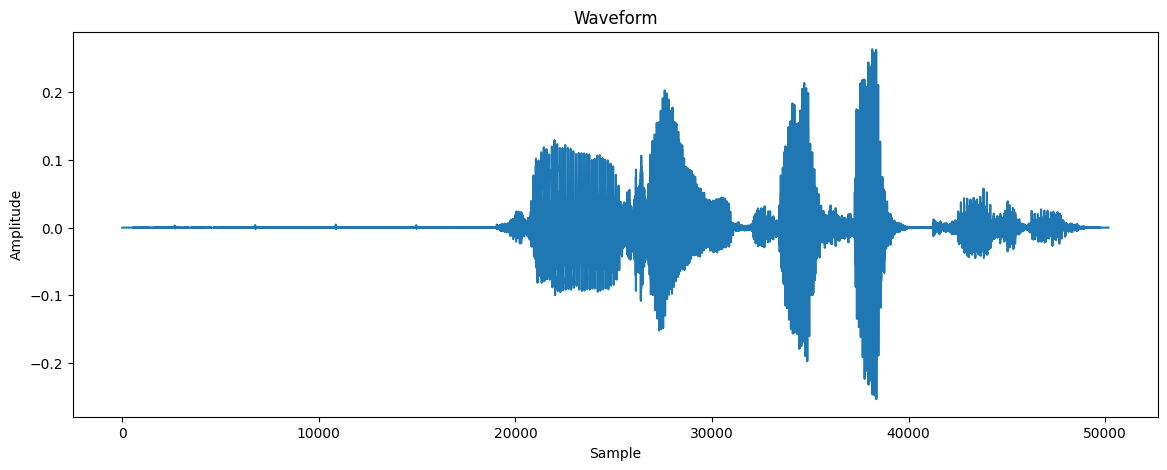

In [ ]:
import matplotlib.pyplot as plt
import librosa

# Load the audio file using librosa
x, sr = librosa.load('/content/drive/MyDrive/음성인식/wav_file/김진2.wav', sr=16000)

plt.figure(figsize=(14, 5))
plt.plot(x)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

음성 메모


In [ ]:
!pip install SpeechRecognition
!pip install librosa

In [ ]:
!pip install gtts
!pip install playsound
!pip install pygobject

In [ ]:
import speech_recognition as sr
from gtts import gTTS
import os
import playsound
import time
from datetime import datetime

In [ ]:
def speak(text):
    tts = gTTS(text=text, lang='ko')
    filename='voice.mp3'
    tts.save(filename) # 파일을 만들고,
    playsound.playsound(filename) # 해당 음성파일을 실행(즉, 음성을 말함)
    os.remove(filename) # <---- 이부분이 없으면 퍼미션 에러 발생(아마도 파일을 연 상태에서 추가적인 파일생성 부분에서 에러가 발생하는 것으로 보임)


In [ ]:
def get_audio():
    r = sr.Recognizer()
    with sr.Microphone() as source:
        # print("지금 말씀하세요: ")
        audio = r.listen(source)
        said = " "

        try:
            said = r.recognize_google(audio, language="ko-KR")
            # print("말씀하신 내용입니다 : ", said)
        except Exception as e:
            pass
            # print("Exception: " + str(e))

    return said

In [ ]:
#############################
# 0.안내 방송(음성)
#############################
# if os.path.isfile('memo.txt'):  //음성 기록이 저장되어야 함으로
#     os.remove('memo.txt')

speak("안녕하세요. 2초 후에 말씀하시고, 종료시 '종료'라고 말씀하시면 됩니다.")






while True:
    #############################
    # 1.음성입력
    #############################
    text=get_audio()

    print(text)



    #############################
    # 2.파일저장
    #############################
    with open('memo.txt', 'a') as f:
        f.write(str(text)+"\n")

    if "종료" in text:
        break

    time.sleep(0.1)

In [ ]:
## 저장된 파일 읽어들여서 저장하는 부분

File = open('memo.txt',"r")
Record = File.read()